# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muh Farhan
- **Email:** farhan082002@gmail.com
- **ID Dicoding:** faarh-nn

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan?
- Bagaimana cuaca dan musim memengaruhi jumlah penyewaan sepeda?
- Pada jam berapa permintaan sepeda paling tinggi dan paling rendah?

## Import Semua Packages/Library yang Digunakan

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat dataset harian (day)

In [3]:
day_df = pd.read_csv('https://github.com/faarh-nn/bike-sharing-data-analysis/blob/main/data/day.csv?raw=true')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Berdasarkan output di atas, diketahui bahwa dataset `day` terdiri dari 731 baris dan 16 kolom

Memuat dataset berdasarkan jam (hour)

In [4]:
hour_df = pd.read_csv('https://github.com/faarh-nn/bike-sharing-data-analysis/blob/main/data/hour.csv?raw=true')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Berdasarkan output di atas, diketahui bahwa dataset `hour` terdiri dari 17379 baris dan 17 kolom

### Assessing Data

Memeriksa keberadaan missing value dan tipe data untuk dataset `day`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan output di atas, diketahui bahwa tidak terdapat missing value pada dataset `day`, namun terdapat beberapa tipe data yang perlu diseusaikan pada tahap data cleaning nantinya.

Memeriksa keberadaan missing value dan tipe data untuk dataset `hour`

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan output di atas, diketahui bahwa tidak terdapat missing value pada dataset `hour`, namun terdapat beberapa tipe data yang perlu diseusaikan pada tahap data cleaning nantinya.

Memeriksa keberadaan duplikasi dataset `day` dan dataset `hour`

In [7]:
print("Jumlah duplikasi untuk data day: ", day_df.duplicated().sum())
print("Jumlah duplikasi untuk data hour: ", hour_df.duplicated().sum())

Jumlah duplikasi untuk data day:  0
Jumlah duplikasi untuk data hour:  0


Berdasarkan output di atas, diketahui bahwa tidak terdapat duplikasi data, baik pada dataset `day` maupun pada dataset `hour`.

### Cleaning Data

Menghapus kolom yang tidak diperlukan. Dalam hal ini, kolom yang akan dihapus adalah kolom `instant` karena informasi yang disimpan oleh kolom ini telah diwakili oleh indeks bawaan dari library pandas.

In [8]:
day_df.drop(['instant'], axis = 1, inplace= True)
hour_df.drop(['instant'], axis = 1, inplace= True)

Mengubah tipe data beberapa kolom sesuai dengan keterangan pada metadata (misalnya, kolom yang mengandung informasi tanggal diubah menjadi `datetime` dan kolom yang mengandung informasi kategorikal diubah menjadi `category`).

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['season'] = day_df.season.astype('category')
hour_df['season'] = hour_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

Mengembalikan nilai dari 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai asli yang belum dinormalisasi untuk mempermudah analisis dan interpretasi ke depannya.

In [10]:
day_df['temp'] = day_df['temp']*41
hour_df['temp'] = hour_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
hour_df['atemp'] = hour_df['atemp']*50
day_df['hum'] = day_df['hum']*100
hour_df['hum'] = hour_df['hum']*100
day_df['windspeed'] = day_df['windspeed']*67
hour_df['windspeed'] = hour_df['windspeed']*67

Melakukan konversi data pada kolom yang bertipe kategori berdasarkan kriteria yang ditunjukkan pada mettadata atau file readme.txt

1. Konversi nilai untuk kolom 'season'

In [11]:
day_df['season'] = day_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
hour_df['season'] = hour_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

2. Konversi nilai untuk kolom 'yr'

In [12]:
day_df['yr'] = day_df['yr'].replace({0: 2011, 1: 2012})
hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})

3. Konversi nilai untuk kolom 'mnth'

In [13]:
day_df['mnth'] = day_df['mnth'].cat.rename_categories({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
hour_df['mnth'] = hour_df['mnth'].cat.rename_categories({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

4. Konversi nilai untuk kolom 'weathersit'

In [14]:
day_df['weathersit'] = day_df['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'})
hour_df['weathersit'] = hour_df['weathersit'].cat.rename_categories({1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'})

5. Konversi nilai untuk kolom 'weekday'

In [15]:
day_df['weekday'] = day_df['weekday'].cat.rename_categories({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
hour_df['weekday'] = hour_df['weekday'].cat.rename_categories({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

6. Konversi nilai untuk kolom 'workingday'

In [16]:
day_df['workingday'] = day_df['workingday'].cat.rename_categories({0: 'No', 1: 'Yes'})
hour_df['workingday'] = hour_df['workingday'].cat.rename_categories({0: 'No', 1: 'Yes'})

## Exploratory Data Analysis (EDA)

### Eksplorasi Dataset `Day`

Agregasi jumlah penyewaan sepeda berdasarkan hari kerja dan hari libur

In [17]:
usage_summary = day_df.groupby("workingday")["cnt"].describe()
print(usage_summary)

            count         mean          std    min      25%     50%     75%  \
workingday                                                                    
No          231.0  4330.168831  2052.141245  605.0  2710.50  4459.0  5907.5   
Yes         500.0  4584.820000  1878.415583   22.0  3344.25  4582.0  5987.5   

               max  
workingday          
No          8714.0  
Yes         8362.0  


C:\Users\farha\AppData\Local\Temp\ipykernel_17564\2425580825.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_summary = day_df.groupby("workingday")["cnt"].describe()


Berdasarkan output di atas, terlihat bahwa secara rata-rata jumlah penyewaan sepeda pada hari kerja lebih tinggi dibandingkan dengan jumlah penyewaan pada akhir pekan, meskipun dengan selisih yang tidak begitu besar.

Agregasi jumlah penyewaan sepeda berdasarkan musim

In [18]:
agg_season = day_df.groupby("season")["cnt"].agg(["sum", "mean", "median", "max", "min"]).reset_index()
agg_season

C:\Users\farha\AppData\Local\Temp\ipykernel_17564\1926030281.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_season = day_df.groupby("season")["cnt"].agg(["sum", "mean", "median", "max", "min"]).reset_index()


,season,sum,mean,median,max,min
0,Winter,471348,2604.132597,2209.0,7836,431
1,Spring,918589,4992.331522,4941.5,8362,795
2,Summer,1061129,5644.303191,5353.5,8714,1115
3,Fall,841613,4728.162921,4634.5,8555,22


Berdasarkan output di atas, terlihat bahwa penyewaan sepeda paling tinggi adalah di musim gugur, diikuti oleh musim panas. Sedangkan Penyewaan sepeda paling rendah di musim dingin, kemungkinan karena suhu lebih dingin dan kondisi kurang mendukung.

Agregasi jumlah penyewaan sepeda berdasarkan kondisi cuaca

In [19]:
agg_weather = day_df.groupby("weathersit")["cnt"].agg(["sum", "mean", "median", "max", "min"]).reset_index()
agg_weather

C:\Users\farha\AppData\Local\Temp\ipykernel_17564\1904980938.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_weather = day_df.groupby("weathersit")["cnt"].agg(["sum", "mean", "median", "max", "min"]).reset_index()


,weathersit,sum,mean,median,max,min
0,Clear,2257952,4876.786177,4844.0,8714,431
1,Misty,996858,4035.862348,4040.0,8362,605
2,Light_RainSnow,37869,1803.285714,1817.0,4639,22


Berdasarkan output di atas, diketahui bahwa penyewaan sepeda tertinggi adalah pada saat cuaca cerah kemudian menurun pada saat cuaca berawan dan hujan. Sedangkan pada saat cuaca ekstrem tidak ada penyewaan, kemungkinan karena kondisi berbahaya yang tidak memungkinkan mobilisasi menggunakan sepeda.

### Eksplorasi Dataset `Hour`

In [20]:
avg_rental_per_hour = hour_df.groupby("hr")["cnt"].mean().reset_index()
avg_rental_per_hour

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


Berdasarkan output di atas, diketahui bahwa jumlah penyewaan sepeda terendah adalah pada dini hari pukul 4 yang memang secara ummum minim aktivitas mobilitas. Sedangkan jumlah penyewaan sepeda tertinggi adalah pada sore hari atau jam pulang kerja sekitar pukul 17.00 hingga 18.00 yang memang merupakan puncak aktivitas mobilitas masyarakat secara umum.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan?

C:\Users\farha\AppData\Local\Temp\ipykernel_17564\3592914787.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = day_df.groupby('weekday')['cnt'].mean().reset_index()


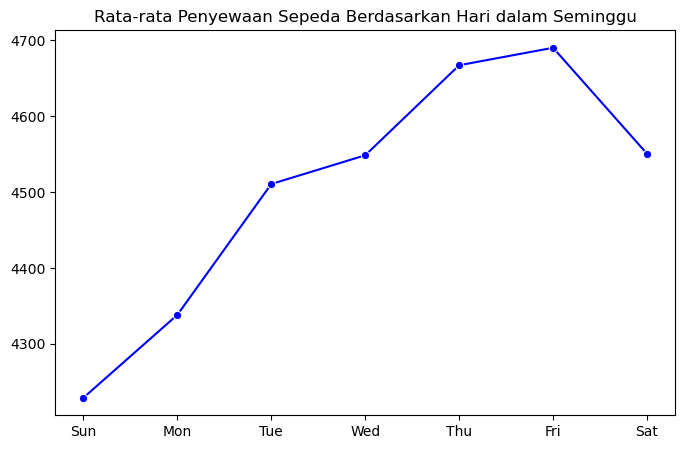

In [33]:
weekday_avg = day_df.groupby('weekday')['cnt'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.lineplot(data=weekday_avg, x='weekday', y='cnt', marker='o', color='blue')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel("")
plt.ylabel("")
plt.show()

Berdasarkan output di atas, diketahui bahwa hari kerja memiliki rata-rata penyewaan lebih tinggi dibandingkan akhir pekan terutama pada Selasa hingga Jumat. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas rutin seperti bekerja atau sekolah. Hasil ini menunjukkan bahwa penggunaan sepeda lebih tinggi selama hari kerja, karena memang penggunaannya untuk transportasi harian yang dapat membantu mengefisiensikan proses mobilitas masyarakat.

### Pertanyaan 2: Bagaimana cuaca dan musim memengaruhi jumlah penyewaan sepeda?

Untuk menjawab pertanyaan 2 ini, akan dibuat tiga visualisasi yaitu rata-rata penyewaan sepeda berdasarkan musim, rata-rata penyewaan sepeda berdasarkan kondisi cuaca, scatter plot hubungan suhu dengan jumlah penyewaan sepeda

C:\Users\farha\AppData\Local\Temp\ipykernel_17564\3547255805.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_season = day_df.groupby('season')['cnt'].mean().sort_values(ascending=False).index


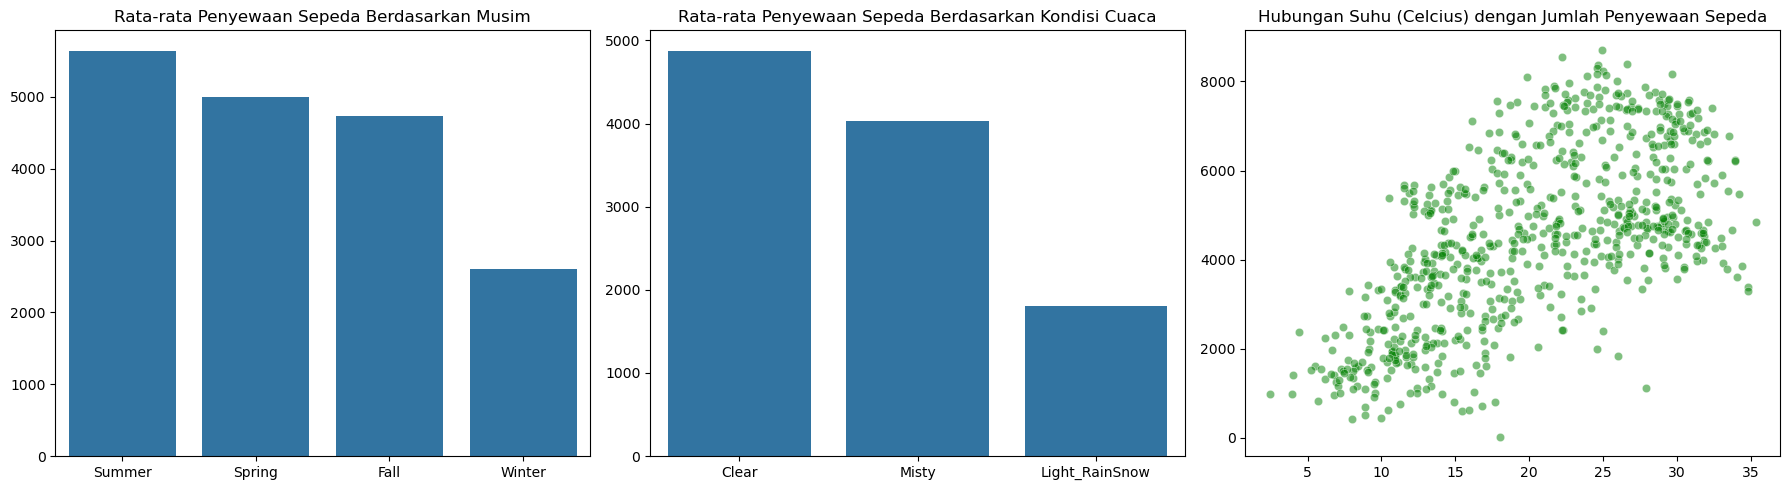

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# rata-rata penyewaan sepeda berdasarkan musim
sorted_season = day_df.groupby('season')['cnt'].mean().sort_values(ascending=False).index
sns.barplot(ax=axes[0], x='season', y='cnt', data=day_df, estimator='mean', errorbar=None, order=sorted_season)
axes[0].set_title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# rata-rata penyewaan sepeda berdasarkan kondisi cuaca
sns.barplot(ax=axes[1], x='weathersit', y='cnt', data=day_df, estimator='mean', errorbar=None)
axes[1].set_title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# scatter plot hubungan suhu dengan jumlah penyewaan sepeda
sns.scatterplot(ax=axes[2], x='temp', y='cnt', data=day_df, alpha=0.5, color='green')
axes[2].set_title('Hubungan Suhu (Celcius) dengan Jumlah Penyewaan Sepeda')
axes[2].set_xlabel('')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

Berdasarkan output di atas, diketahui bahwa jika berdasarkan musim penyewaan sepeda tertinggi berada di musim panas dan diikuti oleh musim gugur. Sedangkan penyewaan sepeda terndah berada di musim dingin. Hal ini kemungkinan besar dimungkinkan karena suhu yang dingin membuat beberapa jalan yang seharunsya bisa dilintasi oleh sepeda menjadi tertutup atau tidak bisa terakses, sehingga membuat sebagian besar orang mengurangi mobilitas atau beralih ke moda transportasi lain.

Kemudian jika ditinjau berdasarkan kondisi cucaca, penyewaan sepeda tertinggi adalah pada saat cuaca cerah kemudian menurun pada saat cuaca berawan dan hujan. Sedangkan pada saat cuaca ekstrem tidak ada penyewaan, kemungkinan karena kondisi berbahaya yang tidak memungkinkan mobilisasi menggunakan sepeda. Hal ini sejalan dengan tinjauan musim yang mana jika kondisi cuaca mendekati karakteristik musim dingin, maka penyewaan sepeda menurun.

Berikutnya, jika ditinjau berdasarkan korelasi (analisis bivariat) terlihat bahwa suhu dan jumlah penyewaan sepeda memiliki korelasi positif, yang berarti bahwa siring peingkatan suhu maka jumlah penyewaan sepeda juga semakin banayk atau semakin bertambah. Sehingga, secara umum dapat dikatakan bahwa aktivitas penyewaan sepeda akan tinggi jika cuaca cerah, suhu tidak terlalu dingin, terutama pada musim panas. 

### Pertanyaan 3: Pada jam berapa permintaan sepeda paling tinggi dan paling rendah?

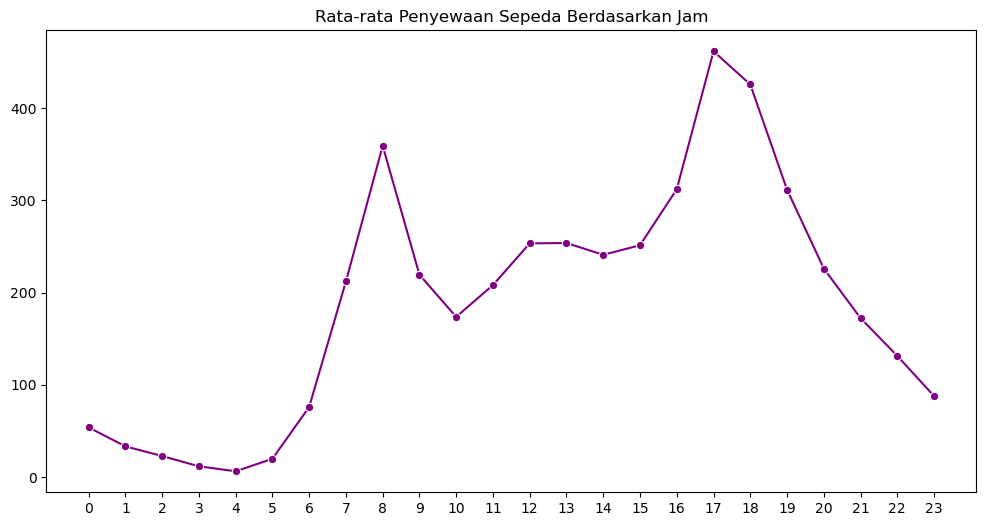

In [36]:
hourly_avg = hour_df.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='hr', y='cnt', marker='o', color='purple')
plt.xticks(ticks=range(24))
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel("")
plt.ylabel("")
plt.show()

Berdasarkan output di atas, terlihat bahwa terdapat beberapa jam yang merupakan waktu sibuk dan beberapa lainnya merupakan waktu sepi. Permintaan meningkat tajam di pagi hari dan sore hari, yang kemungkinan diakibatkan karena jam kerja. Sedangkan jam sepi ditunjukkan pada waktu dini hari. Permintaan tertinggi terjadi pada jam 17:00 (5 sore), kemungkinan karena jam pulang kerja dan permintaan terendah terjadi pada jam 4:00 pagi, saat sebagian besar orang masih tidur.

## Analisis Lanjutan - RFM

Karena tidak ada ID pelanggan, kita akan menggunakan hari sebagai unit analisis, dengan pendekatan sebagai berikut:

- Recency (R) → Hari terakhir di mana terjadi penyewaan tinggi.
- Frequency (F) → Seberapa sering hari tersebut memiliki penyewaan tinggi.
- Monetary (M) → Total penyewaan sepeda dalam suatu periode.

In [23]:
latest_date = day_df["dteday"].max()

Menghitung Recency (R) → Hari sejak terakhir kali terjadi penyewaan tinggi

In [25]:
threshold_high_rentals = day_df["cnt"].quantile(0.75)  # mengambil kuartil atas sebagai batas tinggi
high_rental_days = day_df[day_df["cnt"] >= threshold_high_rentals]
recency = (latest_date - high_rental_days["dteday"]).dt.days.min()

Menghitung Frequency (F) → Berapa kali penyewaan tinggi terjadi dalam periode

In [26]:
frequency = len(high_rental_days)

Menghitung Monetary (M) → Total penyewaan sepeda

In [27]:
monetary = day_df["cnt"].sum()

Menampilkan hasil RFM

In [30]:
rfm_results = {
    "Recency (Hari sejak penyewaan tinggi terakhir)": recency,
    "Frequency (Jumlah hari dengan penyewaan tinggi)": frequency,
    "Monetary (Total penyewaan sepeda)": monetary
}
# membuat dataframe dari hasil rfm
rfm_df = pd.DataFrame.from_dict(rfm_results, orient="index", columns=["Value"])
rfm_df

,Value
Recency (Hari sejak penyewaan tinggi terakhir),27
Frequency (Jumlah hari dengan penyewaan tinggi),183
Monetary (Total penyewaan sepeda),3292679


Berdasarkan analisis RFM yang dilakukan terhadap data penyewaan sepeda, ditemukan bahwa dalam periode dataset terdapat **183 hari** dengan tingkat penyewaan yang tinggi, menunjukkan bahwa permintaan sepeda cukup sering mengalami lonjakan. Namun, **sudah 27 hari sejak terakhir kali terjadi lonjakan penyewaan**, yang dapat mengindikasikan adanya faktor musiman atau tren menurun dalam permintaan sepeda. Selain itu, secara keseluruhan, total penyewaan sepeda mencapai **3,29 juta kali**, yang mencerminkan tingginya penggunaan layanan ini sepanjang periode yang diamati. Kesimpulan ini menunjukkan bahwa meskipun permintaan sepeda cukup stabil, ada potensi untuk menganalisis lebih lanjut faktor-faktor yang memengaruhi perubahan tren, seperti musim, cuaca, atau perbedaan antara hari kerja dan akhir pekan.

## Conclusion

- **Conclution pertanyaan 1:**
Berdasarkan analisis pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan, ditemukan bahwa rata-rata penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, terutama pada **Selasa hingga Jumat**. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai **sarana transportasi rutin**, seperti untuk pergi bekerja atau sekolah. Tren ini mengindikasikan bahwa layanan penyewaan sepeda memiliki peran penting dalam mendukung mobilitas harian masyarakat, terutama di kawasan perkotaan. Sebaliknya, pada akhir pekan, permintaan cenderung lebih rendah, kemungkinan karena penggunaan sepeda lebih bersifat rekreasional daripada fungsional. Kesimpulan ini dapat menjadi dasar bagi pengelola layanan penyewaan sepeda untuk mengoptimalkan ketersediaan sepeda pada hari-hari dengan permintaan tinggi serta mempertimbangkan strategi untuk meningkatkan penggunaan sepeda di akhir pekan.

- **Conclution pertanyaan 2:**
Berdasarkan analisis pengaruh **musim dan cuaca** terhadap jumlah penyewaan sepeda, ditemukan bahwa **musim panas** memiliki tingkat penyewaan tertinggi, diikuti oleh musim gugur, sementara **musim dingin memiliki tingkat penyewaan terendah**. Hal ini kemungkinan disebabkan oleh suhu yang lebih dingin dan kondisi jalan yang kurang mendukung, sehingga mengurangi mobilitas masyarakat dengan sepeda.  
Dari sisi **kondisi cuaca**, penyewaan sepeda tertinggi terjadi saat **cuaca cerah**, kemudian menurun saat **cuaca berawan dan hujan**, dan hampir tidak ada penyewaan saat **cuaca ekstrem**, yang kemungkinan besar disebabkan oleh faktor keselamatan dan kenyamanan pengguna.  
Selain itu, hasil analisis korelasi menunjukkan bahwa terdapat **hubungan positif antara suhu dan jumlah penyewaan sepeda**, di mana semakin tinggi suhu, semakin banyak penyewaan sepeda yang terjadi. Dengan demikian, dapat disimpulkan bahwa **aktivitas penyewaan sepeda cenderung tinggi pada cuaca cerah, suhu yang lebih hangat, serta terutama pada musim panas**, sementara kondisi cuaca ekstrem dan suhu rendah mengurangi permintaan secara signifikan. Temuan ini dapat menjadi dasar bagi pengelola layanan sepeda untuk menyesuaikan strategi operasional, seperti penyediaan sepeda yang lebih banyak di musim panas dan promosi penggunaan sepeda di musim dingin dengan fasilitas pendukung yang lebih baik.

- **Conclution pertanyaan 3:**
Berdasarkan analisis pola permintaan sepeda dalam sehari, ditemukan bahwa terdapat **jam-jam sibuk dan jam-jam sepi** dalam penyewaan sepeda. Permintaan sepeda mengalami peningkatan signifikan pada **pagi hari dan sore hari**, yang kemungkinan besar berkaitan dengan jam kerja dan mobilitas masyarakat untuk pergi serta pulang dari tempat kerja atau sekolah.  
Puncak permintaan terjadi pada **pukul 17:00 (5 sore)**, yang bertepatan dengan waktu pulang kerja, sementara permintaan terendah terjadi pada **pukul 04:00 pagi**, saat sebagian besar orang masih tidur dan mobilitas masih sangat rendah.  
Temuan ini menunjukkan bahwa sepeda banyak digunakan sebagai **moda transportasi harian**, terutama pada jam sibuk. Informasi ini dapat dimanfaatkan oleh pengelola layanan penyewaan sepeda untuk memastikan ketersediaan sepeda di jam-jam dengan permintaan tinggi serta mempertimbangkan strategi optimalisasi penyebaran sepeda agar dapat mengakomodasi kebutuhan pengguna dengan lebih efisien.

- **Conclution Analisis RFM:**
Berdasarkan analisis **RFM** terhadap data penyewaan sepeda, ditemukan bahwa permintaan sepeda mengalami lonjakan cukup sering, dengan **183 hari** dalam dataset yang memiliki tingkat penyewaan tinggi. Namun, **sudah 27 hari sejak terakhir kali terjadi lonjakan permintaan**, yang dapat mengindikasikan adanya faktor musiman atau tren penurunan dalam penggunaan sepeda. Secara keseluruhan, layanan penyewaan sepeda telah digunakan sebanyak **3,29 juta kali**, yang menunjukkan bahwa sepeda merupakan moda transportasi yang cukup populer dan banyak digunakan.  
Meskipun permintaan sepeda tergolong stabil, ada peluang untuk mengeksplorasi lebih lanjut faktor-faktor yang memengaruhi fluktuasi penyewaan, seperti **musim, cuaca, atau perbedaan pola penggunaan antara hari kerja dan akhir pekan**. Pemahaman lebih dalam mengenai tren ini dapat membantu dalam pengelolaan armada sepeda dan pengembangan strategi untuk meningkatkan jumlah penyewaan di periode dengan permintaan lebih rendah.

In [32]:
day_df.to_csv("day_df_final.csv", index=False)
hour_df.to_csv("hour_df_final.csv", index=False)